In [ ]:
from textblob import TextBlob

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
twitter_tweets=pd.read_csv('/content/Book_tweets.csv')
twitter_tweets.head(50)

,Tweets
0,i have held back tears. i have cried happy tea...
1,bihday pressie from my mummy and my granny #mi...
2,@user stuck in athens instead of santorini be...
3,@user these happy folks had the very first #f...
4,"what a ""huge"" crowd for trump."
5,i am thankful for saturdays. #thankful #positi...
6,"good god, why?!"
7,@user enjoying these delicious melons! #vegan...
8,"first months, then weeks, now it's only days t..."
9,it's a firework!! weeheeeee~


In [ ]:
# Function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [ ]:
twitter_tweets['Tweets'] = np.array([cleanTxt(tweet) for tweet in twitter_tweets['Tweets']])

In [ ]:
twitter_tweets

,Tweets
0,i have held back tears. i have cried happy tea...
1,bihday pressie from my mummy and my granny mic...
2,stuck in athens instead of santorini because...
3,these happy folks had the very first freaksh...
4,"what a ""huge"" crowd for trump."
...,...
148,model i love u take with u all the time in ur
149,"if lewis remains perfect, the rangers announce..."
150,chris is so to be back to soccer after missi...
151,train tickets booked for my opera week in wales


In [ ]:
twitter_tweets['Subjectivity'] = np.array([TextBlob(tweet).sentiment.subjectivity for tweet in twitter_tweets['Tweets']])
twitter_tweets['Polarity'] = np.array([TextBlob(tweet).sentiment.polarity for tweet in twitter_tweets['Tweets']])
twitter_tweets

,Tweets,Subjectivity,Polarity
0,i have held back tears. i have cried happy tea...,0.666667,0.266667
1,bihday pressie from my mummy and my granny mic...,0.000000,0.000000
2,stuck in athens instead of santorini because...,1.000000,-1.000000
3,these happy folks had the very first freaksh...,0.716667,0.562500
4,"what a ""huge"" crowd for trump.",0.900000,0.400000
...,...,...,...
148,model i love u take with u all the time in ur,0.600000,0.500000
149,"if lewis remains perfect, the rangers announce...",1.000000,1.000000
150,chris is so to be back to soccer after missi...,0.183333,0.100000
151,train tickets booked for my opera week in wales,0.000000,0.000000


In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
twitter_tweets['Analysis'] = np.array([getAnalysis(value) for value in twitter_tweets['Polarity']])
twitter_tweets

,Tweets,Subjectivity,Polarity,Analysis
0,i have held back tears. i have cried happy tea...,0.666667,0.266667,Positive
1,bihday pressie from my mummy and my granny mic...,0.000000,0.000000,Neutral
2,stuck in athens instead of santorini because...,1.000000,-1.000000,Negative
3,these happy folks had the very first freaksh...,0.716667,0.562500,Positive
4,"what a ""huge"" crowd for trump.",0.900000,0.400000,Positive
...,...,...,...,...
148,model i love u take with u all the time in ur,0.600000,0.500000,Positive
149,"if lewis remains perfect, the rangers announce...",1.000000,1.000000,Positive
150,chris is so to be back to soccer after missi...,0.183333,0.100000,Positive
151,train tickets booked for my opera week in wales,0.000000,0.000000,Neutral


In [ ]:
twitter_tweets['Analysis'].value_counts()

Positive    77
Neutral     57
Negative    19
Name: Analysis, dtype: int64

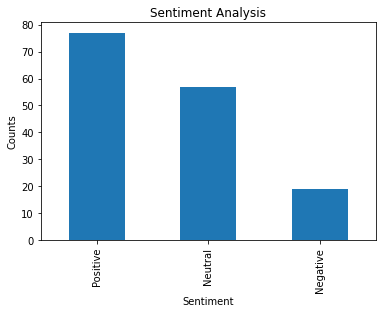

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter_tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# New section